In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(
  rescale=1.0/255.0,
  rotation_range=20,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest'
)

In [11]:
train_generator = train_datagen.flow_from_directory(
  './dataset/train',
  target_size=(128, 128),
  batch_size=32,
  class_mode='binary'  # For binary classification
)

Found 5216 images belonging to 2 classes.


In [12]:
test_generator = train_datagen.flow_from_directory(
  './dataset/test',
  target_size=(128, 128),
  batch_size=32,
  class_mode='binary'  # For binary classification
)

Found 624 images belonging to 2 classes.


In [13]:
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [14]:
val_generator = validation_datagen.flow_from_directory(
  './dataset/val',
  target_size=(128, 128),
  batch_size=32,
  class_mode='binary'  # For binary classification
)

Found 16 images belonging to 2 classes.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [10]:
model = Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
  MaxPooling2D(2, 2),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Conv2D(128, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Flatten(),
  Dense(512, activation='relu'),
  Dropout(0.5),
  Dense(1, activation='sigmoid')  # Binary classification
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [3]:
from tensorflow.keras.optimizers.legacy import Adam

In [4]:
import PIL

In [14]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [18]:
history = model.fit(
  train_generator,
  steps_per_epoch=len(train_generator),
  epochs=10,
  validation_data=val_generator,
  validation_steps=len(val_generator)
)

Epoch 1/10


2023-08-22 13:48:18.123320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


163/163 [==============================] - 48s 292ms/step - loss: 0.2987 - accuracy: 0.8673 - val_loss: 0.3186 - val_accuracy: 0.8750
Epoch 2/10


2023-08-22 13:49:05.764208: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


163/163 [==============================] - 56s 341ms/step - loss: 0.2789 - accuracy: 0.8796 - val_loss: 0.3901 - val_accuracy: 0.8750
Epoch 3/10
163/163 [==============================] - 56s 340ms/step - loss: 0.2652 - accuracy: 0.8798 - val_loss: 0.4277 - val_accuracy: 0.8750
Epoch 4/10
163/163 [==============================] - 59s 362ms/step - loss: 0.2417 - accuracy: 0.8967 - val_loss: 0.4682 - val_accuracy: 0.8125
Epoch 5/10
163/163 [==============================] - 57s 349ms/step - loss: 0.2304 - accuracy: 0.9024 - val_loss: 0.3660 - val_accuracy: 0.8750
Epoch 6/10
163/163 [==============================] - 56s 346ms/step - loss: 0.2221 - accuracy: 0.9062 - val_loss: 0.4408 - val_accuracy: 0.8125
Epoch 7/10
163/163 [==============================] - 58s 352ms/step - loss: 0.2114 - accuracy: 0.9122 - val_loss: 0.3503 - val_accuracy: 0.7500
Epoch 8/10
163/163 [==============================] - 57s 352ms/step - loss: 0.1875 - accuracy: 0.9231 - val_loss: 1.1510 - val_accuracy: 0.6

In [19]:
loss, accuracy = model.evaluate(test_generator)

2023-08-22 13:57:49.136091: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


20/20 [==============================] - 5s 232ms/step - loss: 0.4662 - accuracy: 0.8285


In [21]:
print(loss, accuracy)

0.46615883708000183 0.8285256624221802


In [5]:
import matplotlib.pyplot as plt

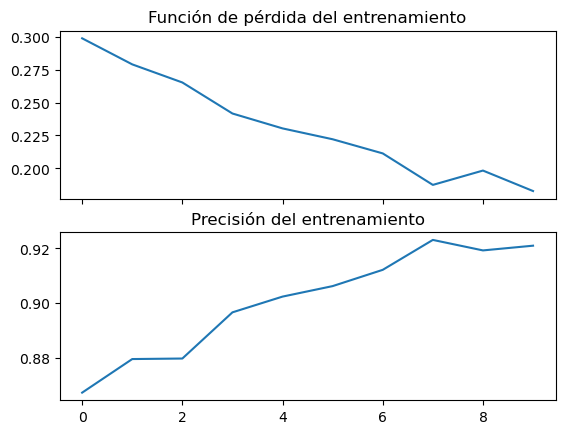

In [25]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['loss'])
ax1.set_title('Función de pérdida del entrenamiento')

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['accuracy'])
ax2.set_title('Precisión del entrenamiento')

plt.setp(ax1.get_xticklabels(), visible=False)
plt.show()

In [26]:
model.save('pneumonia_detection_model_v1.h5')

In [6]:
from keras_tuner.tuners import RandomSearch
from keras_tuner import HyperModel

In [46]:
# Hyperparameter tuning
def build_model(hp: HyperModel):
  model = tf.keras.models.Sequential()

  # Hyperparameters
  filters = hp.Int('filters', min_value=32, max_value=128, step=32)
  kernel_height = hp.Int('kernel_height', min_value=3, max_value=5, step=2)
  kernel_width = hp.Int('kernel_width', min_value=3, max_value=5, step=2)
  pool_size = (2, 2)
  dense_units = hp.Int('dense_units', min_value=128, max_value=256, step=64)
  dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.add(Conv2D(filters, (kernel_height, kernel_width), activation='relu', input_shape=(128, 128, 3)))
  model.add(MaxPooling2D(pool_size))
  model.add(Conv2D(filters * 2, (kernel_height, kernel_width), activation='relu'))
  model.add(MaxPooling2D(pool_size))
  model.add(Flatten())
  model.add(Dense(dense_units, activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer=Adam(learning_rate=hp_learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

  return model

In [59]:
tuner = RandomSearch(
  build_model,
  objective='val_accuracy',
  max_trials=10,
  directory='tuning_3',
  project_name='pneumonia_detection'
)

In [60]:
tuner.search(train_generator, validation_data=val_generator, epochs=6)

Trial 10 Complete [00h 08m 21s]
val_accuracy: 0.75

Best val_accuracy So Far: 0.875
Total elapsed time: 03h 53m 52s
INFO:tensorflow:Oracle triggered exit


In [61]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

In [62]:
test_loss, test_accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")

2023-08-22 23:00:11.014026: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


20/20 [==============================] - 4s 211ms/step - loss: 0.3928 - accuracy: 0.8285
Test Accuracy: 0.8285256624221802


In [63]:
best_model.save('pneumonia_detection_model_tuning.h5')

In [7]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import random

In [114]:
loaded_model = tf.keras.models.load_model('./pneumonia_detection_model_tuning.h5')
loaded_model_2 = tf.keras.models.load_model('./pneumonia_detection_model_v1.h5')

In [107]:
test_loss, test_accuracy = loaded_model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")

2023-08-23 07:42:06.940218: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


20/20 [==============================] - 4s 214ms/step - loss: 0.4349 - accuracy: 0.7981
Test Accuracy: 0.7980769276618958


In [104]:
def show_image(image, target, real):
  plt.figure(figsize=(2,2))
  plt.imshow(image)
  plt.title(f'{target} / {real}')
  plt.axis('off')
  plt.show()

In [98]:
def load_random_images(path, n = 5):
  image_files = [f for f in os.listdir(path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

  return random.sample(image_files, n)

In [108]:
def predict_on_random_images(model, path, images, target):
  for image_file in images:
    # Leemos las imagenes
    image_path = os.path.join(path, image_file)
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale pixel values

    # Realizamos una predicción
    prediction = model.predict(img_array)

    # Obtenemos el label de la predicción
    real = 'Pneumonia' if prediction[0][0] >= 0.5 else 'Normal'
    show_image(img, target, real)

1/1 [==============================] - 0s 15ms/step


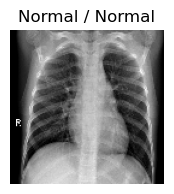

1/1 [==============================] - 0s 18ms/step


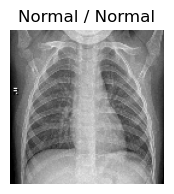

1/1 [==============================] - 0s 47ms/step


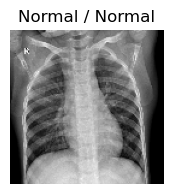

1/1 [==============================] - 0s 16ms/step


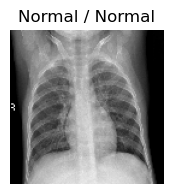

1/1 [==============================] - 0s 17ms/step


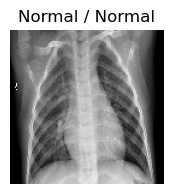

In [120]:
path = './dataset/test/NORMAL/'

images = load_random_images(path, 5)

predict_on_random_images(loaded_model, path, images, 'Normal')

1/1 [==============================] - 0s 42ms/step


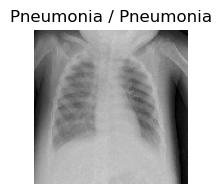

1/1 [==============================] - 0s 21ms/step


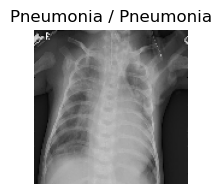

1/1 [==============================] - 0s 17ms/step


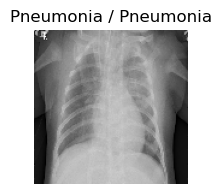

1/1 [==============================] - 0s 19ms/step


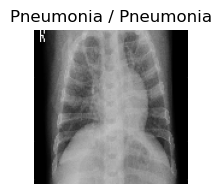

1/1 [==============================] - 0s 35ms/step


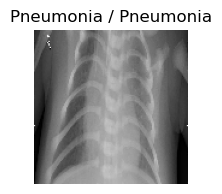

In [119]:
path = './dataset/test/PNEUMONIA/'

images = load_random_images(path, 5)

predict_on_random_images(loaded_model, path, images, 'Pneumonia')

In [8]:
model_no_tuning = tf.keras.models.load_model('../app/apps/server/pneumonia_detection_model_v1.h5')
model_tuning = tf.keras.models.load_model('../app/apps/server/pneumonia_detection_model_tuning.h5')

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
predictions_no_tuning = model_no_tuning.predict(test_generator)
predictions_tuning = model_tuning.predict(test_generator)

2023-08-24 14:28:27.235088: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-08-24 14:28:27.261094: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


20/20 [==============================] - 5s 232ms/step


2023-08-24 14:28:32.262661: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


20/20 [==============================] - 4s 204ms/step


In [16]:
predicted_labels_no_tuning = np.round(predictions_no_tuning) 
predicted_labels_tuning = np.round(predictions_tuning) 

In [18]:
true_labels = test_generator.classes
true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [29]:
def graph_confusion_matrix(predicted_labels, title):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
    plt.xlabel("Pred")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusión {title}")
    plt.show()

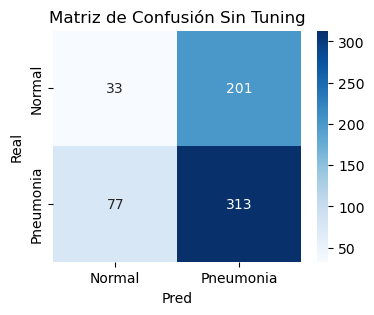

In [30]:
graph_confusion_matrix(predicted_labels_no_tuning, 'Sin Tuning')

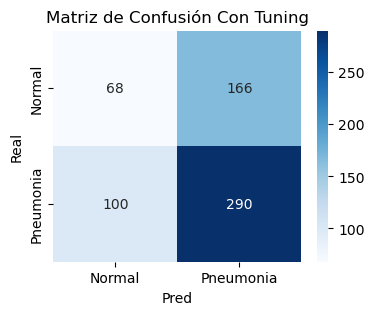

In [31]:
graph_confusion_matrix(predicted_labels_tuning, 'Con Tuning')

In [43]:
def evaluate_model(model):
    loss, accuracy = model.evaluate(test_generator)
    print(f"Test Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    return loss, accuracy

In [44]:
loss_no_tuning, accuracy_no_tuning = evaluate_model(model_no_tuning)

2023-08-24 14:40:41.637804: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


20/20 [==============================] - 4s 204ms/step - loss: 0.5505 - accuracy: 0.7869
Test Loss: 0.5505
Test Accuracy: 0.7869


In [45]:
loss_tuning, accuracy_tuning = evaluate_model(model_tuning)

2023-08-24 14:40:48.734219: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


20/20 [==============================] - 4s 199ms/step - loss: 0.4380 - accuracy: 0.7901
Test Loss: 0.4380
Test Accuracy: 0.7901


In [53]:
def get_history(model, epochs=5):
    return model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=val_generator,
        validation_steps=len(val_generator)
    )

In [54]:
history_no_tuning = get_history(model_no_tuning, 5)

Epoch 1/5


2023-08-24 14:44:58.508431: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


163/163 [==============================] - 51s 312ms/step - loss: 0.1837 - accuracy: 0.9289 - val_loss: 0.7741 - val_accuracy: 0.6250
Epoch 2/5


2023-08-24 14:45:49.460361: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


163/163 [==============================] - 57s 351ms/step - loss: 0.1760 - accuracy: 0.9308 - val_loss: 0.6551 - val_accuracy: 0.7500
Epoch 3/5
163/163 [==============================] - 60s 365ms/step - loss: 0.1761 - accuracy: 0.9291 - val_loss: 0.8137 - val_accuracy: 0.7500
Epoch 4/5
163/163 [==============================] - 61s 376ms/step - loss: 0.1717 - accuracy: 0.9340 - val_loss: 0.9150 - val_accuracy: 0.6875
Epoch 5/5
163/163 [==============================] - 61s 374ms/step - loss: 0.1794 - accuracy: 0.9287 - val_loss: 0.8901 - val_accuracy: 0.7500


In [55]:
history_tuning = get_history(model_tuning, 5)

Epoch 1/5


2023-08-24 14:49:49.379137: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


163/163 [==============================] - 57s 351ms/step - loss: 0.2615 - accuracy: 0.8865 - val_loss: 0.5980 - val_accuracy: 0.7500
Epoch 2/5


2023-08-24 14:50:46.734946: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


163/163 [==============================] - 54s 331ms/step - loss: 0.2569 - accuracy: 0.8896 - val_loss: 0.9754 - val_accuracy: 0.6875
Epoch 3/5
163/163 [==============================] - 53s 326ms/step - loss: 0.2530 - accuracy: 0.8919 - val_loss: 0.7104 - val_accuracy: 0.7500
Epoch 4/5
163/163 [==============================] - 53s 325ms/step - loss: 0.2493 - accuracy: 0.8984 - val_loss: 0.7422 - val_accuracy: 0.7500
Epoch 5/5
163/163 [==============================] - 55s 334ms/step - loss: 0.2271 - accuracy: 0.9038 - val_loss: 0.6873 - val_accuracy: 0.6875


In [59]:
def graph_history(historic):
    fig = plt.figure()

    ax1 = fig.add_subplot(2, 1, 1)
    ax1.plot(historic.history['loss'])
    ax1.set_title('Función de pérdida del entrenamiento')

    ax2 = fig.add_subplot(2, 1, 2)
    ax2.plot(historic.history['accuracy'])
    ax2.set_title('Precisión del entrenamiento')

    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.show()

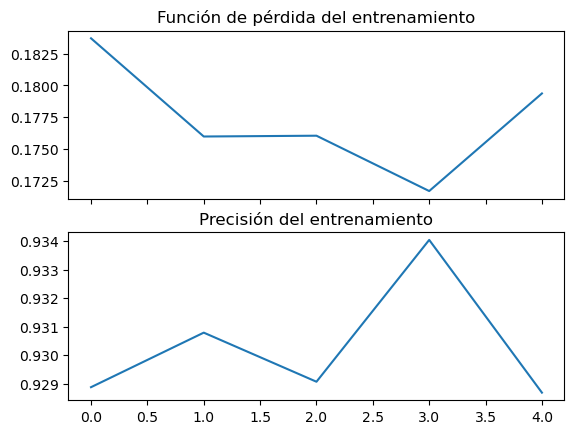

In [61]:
graph_history(history_no_tuning)

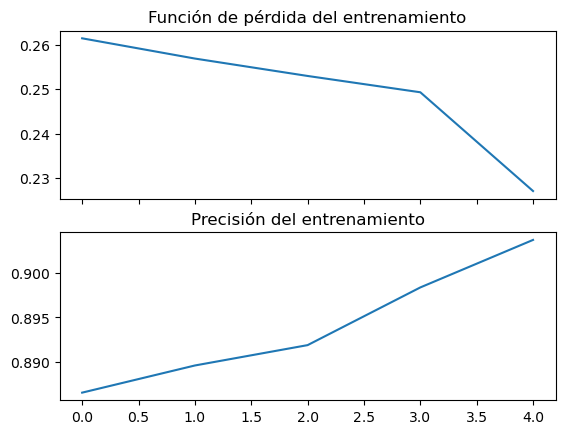

In [62]:
graph_history(history_tuning)